In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Assumptions

1. Essential Medical workers may meet essential medical workers at high meeting rates, with essential non-medical workers at high meeting rates, with non-essential high-risk workers at low meeting rates, with non-essential low-risk workers at low meeting rates, with patients in hospitals at high meeting rate, and with patients in quarantine at high meeting rate.

2. Essential non-medical workers may meet essential non-medical workers at high meeting rate, with non-essential high-risk workers at high meeting rate, with non-essential low-risk workers at high meeting rate, and with patients in quarantine with low meeting rate.

3. Non-essential high-risk workers may meet non-essential high-risk workers at low meeting rate, and with non-essential low-risk workers at low meeting rate.

4. Non-essential low-risk workers may meet non-essential low-risk workers at low meeting rate.

5. Both Symptomatic and Asymptomatic patients may infect others and would either recover from the pandemic and become resistant or die.

6. When an infected person is not known to be symptomatic, other susceptible people would meet the person without protective gears and are thus would be more likely to get infected. On the other hand, essential medical and non-medical workers would usually wear protective gears when meeting patients in hospitals or in quarantine. Therefore, infections are less likely to happen during their meetings.

7. If a person is infected and become symptomatic, the person would be sent to hospitals. Patients in hospitals would only interact with essential medical workers at high meeting rates. Comparing to other infectants Not in hispitals, patients in Hospitals would recover faster and are less likely to die.

8. If hospitals have reached the maximum capacity, new symptomatic patients will be quarantined (outside of hospitals) and would only interact with Essential Medical Workers at High Meeting Rate and interact with Essential Non-Medical Workers at Low Meeting Rate. People in quarantine would either recover and become resistant (at low recovery rate) or die (at high death rate).

9. There are two ways to become resistant, one is through recovering from the illness, the other one is by taking the vaccine. Once a person become resistant, he/she would never get infected.

10. If lockdown measures are taken, the meeting rates among all groups would decrease proportionately.

### Parameters

c1_n: Number of Essential Medical Workers

c2_n: Number of Essential Non-Medical Workers

c3_n: Number of Non-Essential High-Risk Workers

c4_n: Number of Non-Essential Low-Risk Workers

c1_inf: Number of infected Essential Medical Workers

c2_inf: Number of infected Essential Non-Medical Workers

c3_inf: Number of infected Non-Essential High-Risk Workers

c4_inf: Number of infected Non-Essential Low-Risk Workers

Is_inf: Number of Patients in Hospitals

R_res: Number of People that are Resistant

H_cap: Hospital Capacity

pi: Probability that an Infected Person is Symptomatic

reco_lo: Recovery Rate for Infectants Not in Hospitals

reco_hi: Recovery Rate for Infectants in Hospitals

die_lo: Death Rate for Infectants in Hospitals

die_hi: Death Rate for Infectants Not in Hospitals

h: High Meeting Rates

l: Low Meeting Rates

inf_p_lo: Probability of Infection with Protective Gears

inf_p_hi: Probability of Infection without Protective Gears

vac_rate: Vaccination Rate

keep_hist: True - Keep the history of each group, might be slower; False - Not keeping the history

lockdown_fac: Lockdown multiplier from 0 to 1; 0: People Would not Meet; 1: People would meet as usual

vac_pri: Vaccination Priority, default is all vaccines are given to essential medical workers

In [5]:
def SIR(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, H_cap, pi, reco_lo, reco_hi, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac_rate, keep_hist = False, lockdown_fac = 1.0, vac_pri = [1.0, 0., 0., 0.]):
    
    h = h * lockdown_fac
    l = l * lockdown_fac
    
    lam11 = h
    lam12 = h
    lam13 = l
    lam14 = l
    lam15 = h
    lam22 = h
    lam23 = h
    lam24 = h
    lam33 = l
    lam34 = l
    lam44 = l
    lamq1 = h
    lamq2 = l
    
    tot_infect = c1_inf + c2_inf + c3_inf + c4_inf + Is_inf
    
    c1_infect_hist = []
    c2_infect_hist = []
    c3_infect_hist = []
    c4_infect_hist = []
    c1_suscep_hist = []
    c2_suscep_hist = []
    c3_suscep_hist = []
    c4_suscep_hist = []
    Is_hist = []
    R_hist = []
    Death_hist = []
    Quarantine_hist = []
    
    c1_infect = []
    c2_infect = []
    c3_infect = []
    c4_infect = []
    c1_suscep = []
    c2_suscep = []
    c3_suscep = []
    c4_suscep = []
    Is = []
    R = []
    Death = []
    Quarantine = []
    
    for i in range(c1_n + c2_n + c3_n + c4_n + Is_inf + R_res):
        if i < c1_n:
            if i < c1_inf:
                c1_infect.append(i)
            else:
                c1_suscep.append(i)
        elif i < (c1_n + c2_n):
            if i < c1_n + c2_inf:
                c2_infect.append(i)
            else:
                c2_suscep.append(i)
        elif i < (c1_n + c2_n + c3_n):
            if i < c1_n + c2_n + c3_inf:
                c3_infect.append(i)
            else:
                c3_suscep.append(i)
        elif i < (c1_n + c2_n + c3_n + c4_n):
            if i < (c1_n + c2_n + c3_n + c4_inf):
                c4_infect.append(i)
            else:
                c4_suscep.append(i)
        elif i < (c1_n + c2_n + c3_n + c4_n + Is_inf):
            Is.append(i)
        else:
            R.append(i)
            
    if keep_hist == True:
        c1_infect_hist.append(c1_infect.copy())
        c2_infect_hist.append(c2_infect.copy())
        c3_infect_hist.append(c3_infect.copy())
        c4_infect_hist.append(c4_infect.copy())
        c1_suscep_hist.append(c1_suscep.copy())
        c2_suscep_hist.append(c2_suscep.copy())
        c3_suscep_hist.append(c3_suscep.copy())
        c4_suscep_hist.append(c4_suscep.copy())
        Is_hist.append(Is.copy())
        R_hist.append(R.copy())
        Death_hist.append(Death.copy())
        Quarantine_hist.append(Quarantine.copy())
    
    while len(c1_infect) + len(c2_infect) + len(c3_infect) + len(c4_infect) + len(Is) + len(Quarantine) > 0:
        
        # infection rates
        ra_11 = len(c1_infect) * len(c1_suscep) * lam11 * inf_p_hi
        ra_12 = len(c1_infect) * len(c2_suscep) * lam12 * inf_p_hi
        ra_21 = len(c1_suscep) * len(c2_infect) * lam12 * inf_p_hi
        ra_13 = len(c1_infect) * len(c3_suscep) * lam13 * inf_p_hi
        ra_31 = len(c1_suscep) * len(c3_infect) * lam13 * inf_p_hi
        ra_14 = len(c1_infect) * len(c4_suscep) * lam14 * inf_p_hi
        ra_41 = len(c1_suscep) * len(c4_infect) * lam14 * inf_p_hi
        ra_s1 = len(c1_suscep) * len(Is) * lam15 * inf_p_lo
        ra_22 = len(c2_infect) * len(c2_suscep) * lam22 * inf_p_hi
        ra_23 = len(c2_infect) * len(c3_suscep) * lam23 * inf_p_hi
        ra_32 = len(c2_suscep) * len(c3_infect) * lam23 * inf_p_hi
        ra_24 = len(c2_infect) * len(c4_suscep) * lam24 * inf_p_hi
        ra_42 = len(c2_suscep) * len(c4_infect) * lam24 * inf_p_hi
        ra_33 = len(c3_infect) * len(c3_suscep) * lam33 * inf_p_hi
        ra_34 = len(c3_infect) * len(c4_suscep) * lam34 * inf_p_hi
        ra_43 = len(c3_suscep) * len(c4_infect) * lam34 * inf_p_hi
        ra_44 = len(c4_infect) * len(c4_suscep) * lam44 * inf_p_hi
        
        # recover rates
        re_c1 = len(c1_infect) * reco_lo
        re_c2 = len(c2_infect) * reco_lo
        re_c3 = len(c3_infect) * reco_lo
        re_c4 = len(c4_infect) * reco_lo
        re_Is = len(Is) * reco_hi
        
        # death rates
        de_c1 = len(c1_infect) * die_hi
        de_c2 = len(c2_infect) * die_hi
        de_c3 = len(c3_infect) * die_hi
        de_c4 = len(c4_infect) * die_hi
        de_Is = len(Is) * die_lo
        
        # quanantine infection rates
        ra_q1 = len(Quarantine) * len(c1_suscep) * lamq1 * inf_p_lo
        ra_q2 = len(Quarantine) * len(c2_suscep) * lamq2 * inf_p_lo
        
        # vaccination rates
        va_c1 = len(c1_suscep) * vac_rate * vac_pri[0]
        va_c2 = len(c2_suscep) * vac_rate * vac_pri[1]
        va_c3 = len(c3_suscep) * vac_rate * vac_pri[2]
        va_c4 = len(c4_suscep) * vac_rate * vac_pri[3]
        
        # quarantine
        re_qu = len(Quarantine) * reco_lo
        de_qu = len(Quarantine) * die_hi
        
        sum_rate1 = ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1 + ra_22 + ra_23 + ra_32
        sum_rate2 = ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1 + re_c2 + re_c3 + re_c4 + re_Is
        sum_rate3 = de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2 + va_c1 + va_c2 + va_c3 + va_c4
        sum_rate = sum_rate1 + sum_rate2 + sum_rate3 + re_qu + de_qu
        
        rv = np.random.uniform()
        rv2 = np.random.uniform()
        
        if rv < ra_11 / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13) / sum_rate:
            infected = c3_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c3_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14) / sum_rate:
            infected = c4_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c4_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1 + ra_22) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1 + ra_22 + ra_23) / sum_rate:
            infected = c3_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c3_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1 + ra_22 + ra_23 + ra_32) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (sum_rate1 + ra_24) / sum_rate:
            infected = c4_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c4_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33) / sum_rate:
            infected = c3_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c3_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34) / sum_rate:
            infected = c4_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c4_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43) / sum_rate:
            infected = c3_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c3_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44) / sum_rate:
            infected = c4_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c4_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1) / sum_rate:
            recovered = c1_infect.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1 + re_c2) / sum_rate:
            recovered = c2_infect.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1 + re_c2 + re_c3) / sum_rate:
            recovered = c3_infect.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1 + re_c2 + re_c3 + re_c4) / sum_rate:
            recovered = c4_infect.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + sum_rate2) / sum_rate:
            recovered = Is.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + sum_rate2 + de_c1) / sum_rate:
            dead = c1_infect.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2) / sum_rate:
            dead = c2_infect.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3) / sum_rate:
            dead = c3_infect.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4) / sum_rate:
            dead = c4_infect.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is) / sum_rate:
            dead = Is.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2 + va_c1) / sum_rate:
            vaccine = c1_suscep.pop(0)
            R.append(vaccine)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2 + va_c1 + va_c2) / sum_rate:
            vaccine = c2_suscep.pop(0)
            R.append(vaccine)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2 + va_c1 + va_c2 + va_c3) / sum_rate:
            vaccine = c3_suscep.pop(0)
            R.append(vaccine)
        elif rv < (sum_rate1 + sum_rate2 + sum_rate3) / sum_rate:
            vaccine = c4_suscep.pop(0)
            R.append(vaccine)
        elif rv < (sum_rate1 + sum_rate2 + sum_rate3 + re_qu) / sum_rate:
            recovered = Quarantine.pop(0)
            R.append(recovered)
        else:
            dead = Quarantine.pop(0)
            Death.append(dead)
        
        if keep_hist == True:
            c1_infect_hist.append(c1_infect.copy())
            c2_infect_hist.append(c2_infect.copy())
            c3_infect_hist.append(c3_infect.copy())
            c4_infect_hist.append(c4_infect.copy())
            c1_suscep_hist.append(c1_suscep.copy())
            c2_suscep_hist.append(c2_suscep.copy())
            c3_suscep_hist.append(c3_suscep.copy())
            c4_suscep_hist.append(c4_suscep.copy())
            Is_hist.append(Is.copy())
            R_hist.append(R.copy())
            Death_hist.append(Death.copy())
            Quarantine_hist.append(Quarantine.copy())
        
    if keep_hist == True:
        return c1_infect_hist, c2_infect_hist, c3_infect_hist, c4_infect_hist, c1_suscep_hist, c2_suscep_hist, c3_suscep_hist, c4_suscep_hist, Is_hist, R_hist, Death_hist, Quarantine_hist
    else:
        return tot_infect, len(Death)

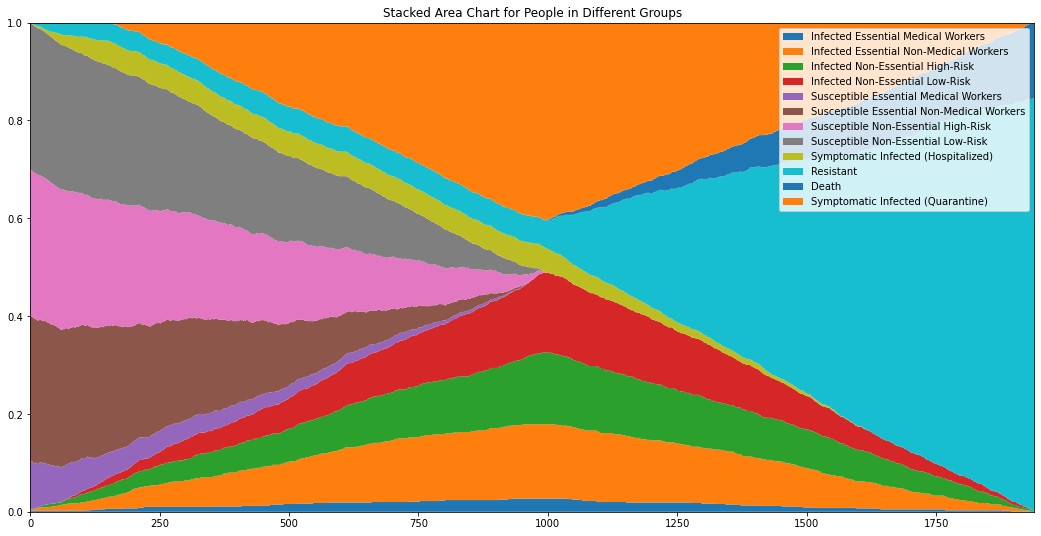

In [18]:
c1_infect_hist, c2_infect_hist, c3_infect_hist, c4_infect_hist, c1_suscep_hist, c2_suscep_hist, c3_suscep_hist, c4_suscep_hist\
, Is_hist, R_hist, death_hist, quar_hist = SIR(100, 300, 300, 300, 1, 3, 1, 0, 0, 0, 50, 0.5, 0.1, 0.3, 0.01, 0.02, 1.5, 0.5, 0.05, 0.6, 50, True)

c1_inf_num = [len(item) for item in c1_infect_hist]
c2_inf_num = [len(item) for item in c2_infect_hist]
c3_inf_num = [len(item) for item in c3_infect_hist]
c4_inf_num = [len(item) for item in c4_infect_hist]
c1_sus_num = [len(item) for item in c1_suscep_hist]
c2_sus_num = [len(item) for item in c2_suscep_hist]
c3_sus_num = [len(item) for item in c3_suscep_hist]
c4_sus_num = [len(item) for item in c4_suscep_hist]
Is_num = [len(item) for item in Is_hist]
R_num = [len(item) for item in R_hist]
D_num = [len(item) for item in death_hist]
Q_num = [len(item) for item in quar_hist]

data = pd.DataFrame({'Infected Essential Medical Workers':c1_inf_num, 'Infected Essential Non-Medical Workers':c2_inf_num, \
                    'Infected Non-Essential High-Risk':c3_inf_num, 'Infected Non-Essential Low-Risk':c4_inf_num, \
                    'Susceptible Essential Medical Workers':c1_sus_num, 'Susceptible Essential Non-Medical Workers':c2_sus_num, \
                    'Susceptible Non-Essential High-Risk': c3_sus_num, 'Susceptible Non-Essential Low-Risk':c4_sus_num, \
                    'Symptomatic Infected (Hospitalized)':Is_num, 'Resistant':R_num, 'Death':D_num, 'Symptomatic Infected (Quarantine)':Q_num})

data_perc = data.divide(data.sum(axis=1), axis = 0)

plt.figure(figsize=(18, 9))
plt.stackplot(range(len(c1_inf_num)),  data_perc["Infected Essential Medical Workers"],  data_perc["Infected Essential Non-Medical Workers"], \
              data_perc["Infected Non-Essential High-Risk"], data_perc["Infected Non-Essential Low-Risk"], \
              data_perc["Susceptible Essential Medical Workers"], data_perc["Susceptible Essential Non-Medical Workers"], \
              data_perc["Susceptible Non-Essential High-Risk"], data_perc["Susceptible Non-Essential Low-Risk"], \
              data_perc["Symptomatic Infected (Hospitalized)"], data_perc["Resistant"], data_perc["Death"], data_perc["Symptomatic Infected (Quarantine)"], labels=data_perc.columns)
plt.legend(loc='upper right')
plt.margins(0,0)
plt.title('Stacked Area Chart for People in Different Groups')
plt.show()

# Hospital Capacity

In [33]:
c1_n = 1250
c2_n = 1250
c3_n = 1250
c4_n = 1250
c1_inf = 10 
c2_inf = 20 
c3_inf = 5 
c4_inf = 0 
Is_inf = 0
R_res = 0
pi = 0.5 
reco_lo = 0.1
reco_hi = 0.3 
die_lo = 0.01
die_hi = 0.02
h = 1.5
l = 0.5
inf_p_lo = 0.02
inf_p_hi = 0.5
vac_rate = 50

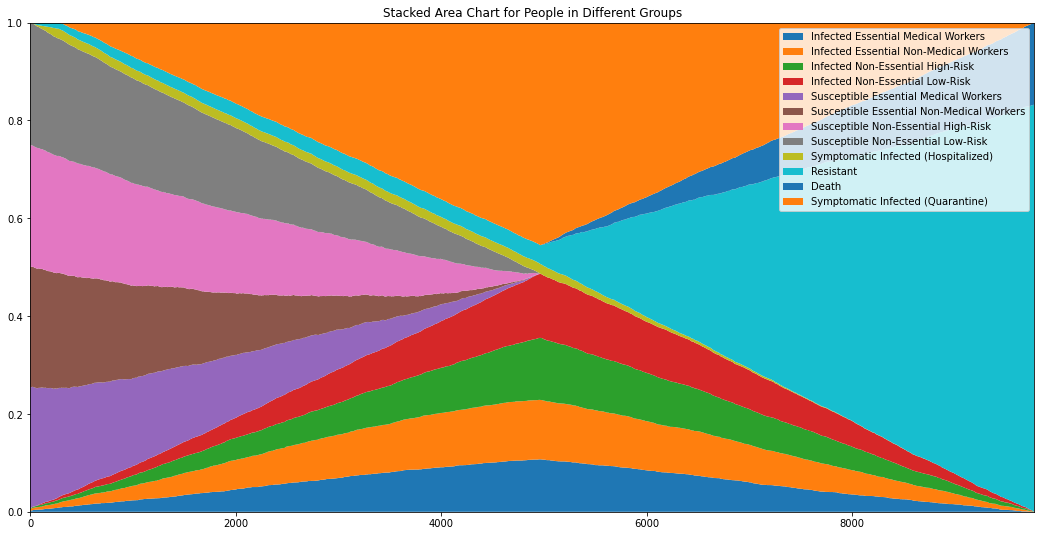

In [35]:
c1_infect_hist, c2_infect_hist, c3_infect_hist, c4_infect_hist, c1_suscep_hist, c2_suscep_hist, c3_suscep_hist, c4_suscep_hist\
, Is_hist, R_hist, death_hist, quar_hist = SIR(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, 100, pi, reco_lo, reco_hi, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac_rate, True)

c1_inf_num = [len(item) for item in c1_infect_hist]
c2_inf_num = [len(item) for item in c2_infect_hist]
c3_inf_num = [len(item) for item in c3_infect_hist]
c4_inf_num = [len(item) for item in c4_infect_hist]
c1_sus_num = [len(item) for item in c1_suscep_hist]
c2_sus_num = [len(item) for item in c2_suscep_hist]
c3_sus_num = [len(item) for item in c3_suscep_hist]
c4_sus_num = [len(item) for item in c4_suscep_hist]
Is_num = [len(item) for item in Is_hist]
R_num = [len(item) for item in R_hist]
D_num = [len(item) for item in death_hist]
Q_num = [len(item) for item in quar_hist]

data = pd.DataFrame({'Infected Essential Medical Workers':c1_inf_num, 'Infected Essential Non-Medical Workers':c2_inf_num, \
                    'Infected Non-Essential High-Risk':c3_inf_num, 'Infected Non-Essential Low-Risk':c4_inf_num, \
                    'Susceptible Essential Medical Workers':c1_sus_num, 'Susceptible Essential Non-Medical Workers':c2_sus_num, \
                    'Susceptible Non-Essential High-Risk': c3_sus_num, 'Susceptible Non-Essential Low-Risk':c4_sus_num, \
                    'Symptomatic Infected (Hospitalized)':Is_num, 'Resistant':R_num, 'Death':D_num, 'Symptomatic Infected (Quarantine)':Q_num})

data_perc = data.divide(data.sum(axis=1), axis = 0)

plt.figure(figsize=(18, 9))
plt.stackplot(range(len(c1_inf_num)),  data_perc["Infected Essential Medical Workers"],  data_perc["Infected Essential Non-Medical Workers"], \
              data_perc["Infected Non-Essential High-Risk"], data_perc["Infected Non-Essential Low-Risk"], \
              data_perc["Susceptible Essential Medical Workers"], data_perc["Susceptible Essential Non-Medical Workers"], \
              data_perc["Susceptible Non-Essential High-Risk"], data_perc["Susceptible Non-Essential Low-Risk"], \
              data_perc["Symptomatic Infected (Hospitalized)"], data_perc["Resistant"], data_perc["Death"], data_perc["Symptomatic Infected (Quarantine)"], labels=data_perc.columns)
plt.legend(loc='upper right')
plt.margins(0,0)
plt.title('Stacked Area Chart for People in Different Groups')
plt.show()

In [34]:
times = 100
Hospital_list = np.arange(100, 1001, 20)

estimate_infect = []
estimate_death = []

for h_cap in Hospital_list:
    print(h_cap)
    temp_infect = []
    temp_death = []
    for i in range(times):
        total_infect, total_death = SIR(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, h_cap, pi, reco_lo, reco_hi, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac_rate)
        temp_infect.append(total_infect)
        temp_death.append(total_death)
    temp_mean = np.mean(temp_infect)
    temp_std = np.std(temp_infect, ddof = 1) / np.sqrt(times)
    estimate_infect.append((temp_mean - 1.96 * temp_std, temp_mean, temp_mean + 1.96 * temp_std))
    temp_mean = np.mean(temp_death)
    temp_std = np.std(temp_death, ddof = 1) / np.sqrt(times)
    estimate_death.append((temp_mean - 1.96 * temp_std, temp_mean, temp_mean + 1.96 * temp_std))

100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000


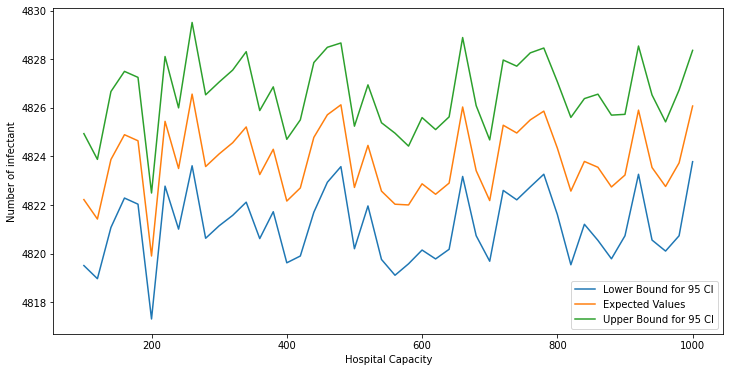

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(Hospital_list, [item[0] for item in estimate_infect], label = 'Lower Bound for 95 CI')
plt.plot(Hospital_list, [item[1] for item in estimate_infect], label = 'Expected Values')
plt.plot(Hospital_list, [item[2] for item in estimate_infect], label = 'Upper Bound for 95 CI')
plt.legend()
plt.xlabel('Hospital Capacity')
plt.ylabel('Number of infectant')
plt.show()

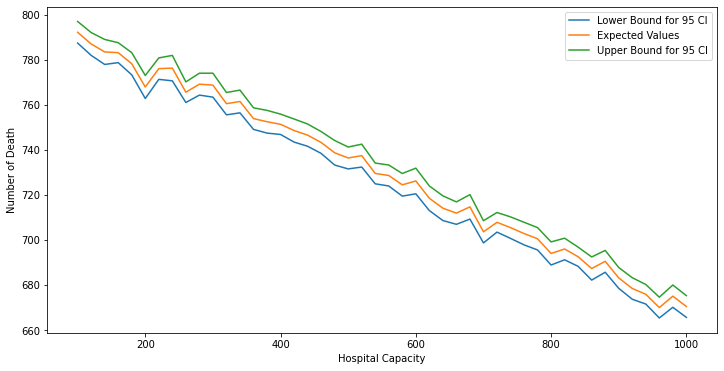

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(Hospital_list, [item[0] for item in estimate_death], label = 'Lower Bound for 95 CI')
plt.plot(Hospital_list, [item[1] for item in estimate_death], label = 'Expected Values')
plt.plot(Hospital_list, [item[2] for item in estimate_death], label = 'Upper Bound for 95 CI')
plt.legend()
plt.xlabel('Hospital Capacity')
plt.ylabel('Number of Death')
plt.show()

# Vaccine

In [39]:
c1_n = 1250
c2_n = 1250
c3_n = 1250
c4_n = 1250
c1_inf = 10 
c2_inf = 20 
c3_inf = 5 
c4_inf = 0 
Is_inf = 0
R_res = 0
H_cap = 500
pi = 0.5 
reco_lo = 0.1
reco_hi = 0.3 
die_lo = 0.01
die_hi = 0.02
h = 1.5
l = 0.5
inf_p_lo = 0.02
inf_p_hi = 0.5
vac_rate = 50
lockdown_fac = 1.0
vac_pri1 = [1.0, 0., 0., 0.]
vac_pri2 = [0.5, 0.5, 0., 0.]
vac_pri3 = [0.25, 0.25, 0.25, 0.25]

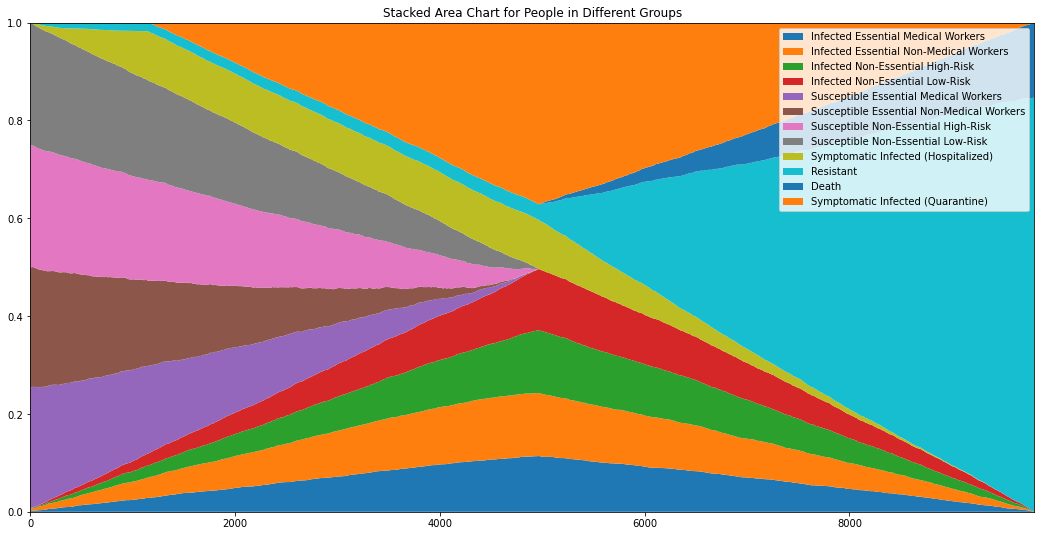

In [40]:
c1_infect_hist, c2_infect_hist, c3_infect_hist, c4_infect_hist, c1_suscep_hist, c2_suscep_hist, c3_suscep_hist, c4_suscep_hist\
, Is_hist, R_hist, death_hist, quar_hist = SIR(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, H_cap, pi, reco_lo, reco_hi, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac_rate, True, lockdown_fac, vac_pri1)

c1_inf_num = [len(item) for item in c1_infect_hist]
c2_inf_num = [len(item) for item in c2_infect_hist]
c3_inf_num = [len(item) for item in c3_infect_hist]
c4_inf_num = [len(item) for item in c4_infect_hist]
c1_sus_num = [len(item) for item in c1_suscep_hist]
c2_sus_num = [len(item) for item in c2_suscep_hist]
c3_sus_num = [len(item) for item in c3_suscep_hist]
c4_sus_num = [len(item) for item in c4_suscep_hist]
Is_num = [len(item) for item in Is_hist]
R_num = [len(item) for item in R_hist]
D_num = [len(item) for item in death_hist]
Q_num = [len(item) for item in quar_hist]

data = pd.DataFrame({'Infected Essential Medical Workers':c1_inf_num, 'Infected Essential Non-Medical Workers':c2_inf_num, \
                    'Infected Non-Essential High-Risk':c3_inf_num, 'Infected Non-Essential Low-Risk':c4_inf_num, \
                    'Susceptible Essential Medical Workers':c1_sus_num, 'Susceptible Essential Non-Medical Workers':c2_sus_num, \
                    'Susceptible Non-Essential High-Risk': c3_sus_num, 'Susceptible Non-Essential Low-Risk':c4_sus_num, \
                    'Symptomatic Infected (Hospitalized)':Is_num, 'Resistant':R_num, 'Death':D_num, 'Symptomatic Infected (Quarantine)':Q_num})

data_perc = data.divide(data.sum(axis=1), axis = 0)

plt.figure(figsize=(18, 9))
plt.stackplot(range(len(c1_inf_num)),  data_perc["Infected Essential Medical Workers"],  data_perc["Infected Essential Non-Medical Workers"], \
              data_perc["Infected Non-Essential High-Risk"], data_perc["Infected Non-Essential Low-Risk"], \
              data_perc["Susceptible Essential Medical Workers"], data_perc["Susceptible Essential Non-Medical Workers"], \
              data_perc["Susceptible Non-Essential High-Risk"], data_perc["Susceptible Non-Essential Low-Risk"], \
              data_perc["Symptomatic Infected (Hospitalized)"], data_perc["Resistant"], data_perc["Death"], data_perc["Symptomatic Infected (Quarantine)"], labels=data_perc.columns)
plt.legend(loc='upper right')
plt.margins(0,0)
plt.title('Stacked Area Chart for People in Different Groups')
plt.show()

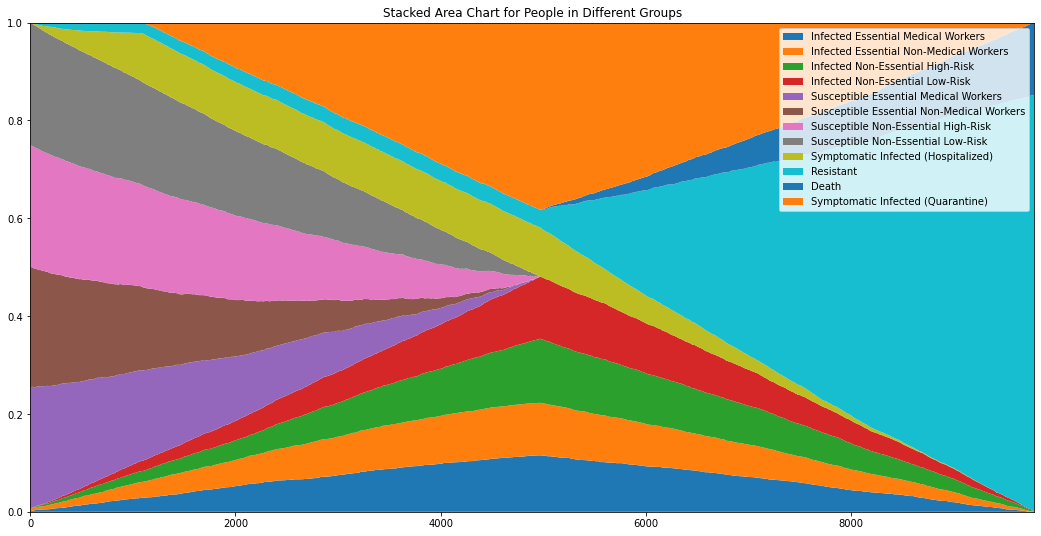

In [41]:
c1_infect_hist, c2_infect_hist, c3_infect_hist, c4_infect_hist, c1_suscep_hist, c2_suscep_hist, c3_suscep_hist, c4_suscep_hist\
, Is_hist, R_hist, death_hist, quar_hist = SIR(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, H_cap, pi, reco_lo, reco_hi, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac_rate, True, lockdown_fac, vac_pri2)

c1_inf_num = [len(item) for item in c1_infect_hist]
c2_inf_num = [len(item) for item in c2_infect_hist]
c3_inf_num = [len(item) for item in c3_infect_hist]
c4_inf_num = [len(item) for item in c4_infect_hist]
c1_sus_num = [len(item) for item in c1_suscep_hist]
c2_sus_num = [len(item) for item in c2_suscep_hist]
c3_sus_num = [len(item) for item in c3_suscep_hist]
c4_sus_num = [len(item) for item in c4_suscep_hist]
Is_num = [len(item) for item in Is_hist]
R_num = [len(item) for item in R_hist]
D_num = [len(item) for item in death_hist]
Q_num = [len(item) for item in quar_hist]

data = pd.DataFrame({'Infected Essential Medical Workers':c1_inf_num, 'Infected Essential Non-Medical Workers':c2_inf_num, \
                    'Infected Non-Essential High-Risk':c3_inf_num, 'Infected Non-Essential Low-Risk':c4_inf_num, \
                    'Susceptible Essential Medical Workers':c1_sus_num, 'Susceptible Essential Non-Medical Workers':c2_sus_num, \
                    'Susceptible Non-Essential High-Risk': c3_sus_num, 'Susceptible Non-Essential Low-Risk':c4_sus_num, \
                    'Symptomatic Infected (Hospitalized)':Is_num, 'Resistant':R_num, 'Death':D_num, 'Symptomatic Infected (Quarantine)':Q_num})

data_perc = data.divide(data.sum(axis=1), axis = 0)

plt.figure(figsize=(18, 9))
plt.stackplot(range(len(c1_inf_num)),  data_perc["Infected Essential Medical Workers"],  data_perc["Infected Essential Non-Medical Workers"], \
              data_perc["Infected Non-Essential High-Risk"], data_perc["Infected Non-Essential Low-Risk"], \
              data_perc["Susceptible Essential Medical Workers"], data_perc["Susceptible Essential Non-Medical Workers"], \
              data_perc["Susceptible Non-Essential High-Risk"], data_perc["Susceptible Non-Essential Low-Risk"], \
              data_perc["Symptomatic Infected (Hospitalized)"], data_perc["Resistant"], data_perc["Death"], data_perc["Symptomatic Infected (Quarantine)"], labels=data_perc.columns)
plt.legend(loc='upper right')
plt.margins(0,0)
plt.title('Stacked Area Chart for People in Different Groups')
plt.show()

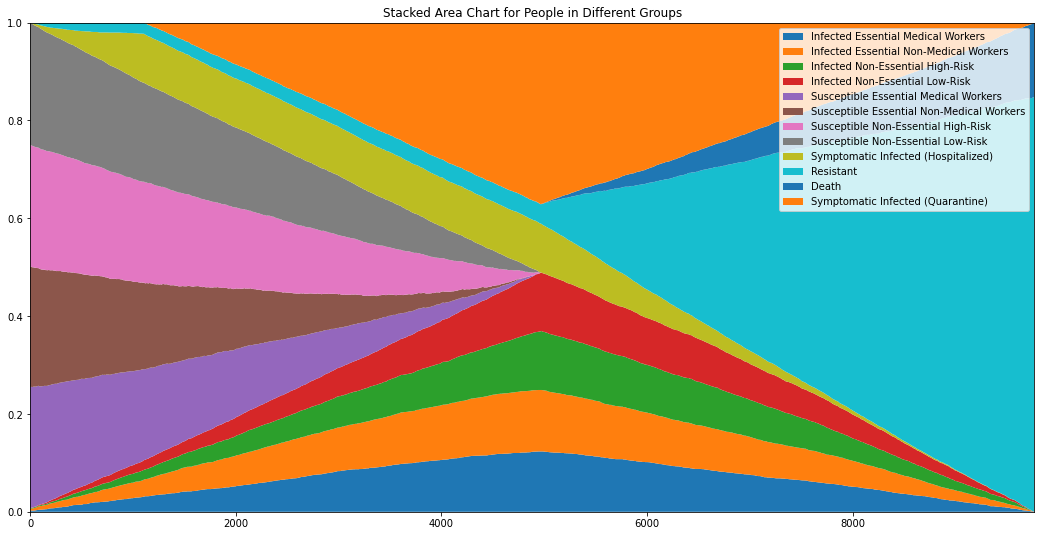

In [42]:
c1_infect_hist, c2_infect_hist, c3_infect_hist, c4_infect_hist, c1_suscep_hist, c2_suscep_hist, c3_suscep_hist, c4_suscep_hist\
, Is_hist, R_hist, death_hist, quar_hist = SIR(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, H_cap, pi, reco_lo, reco_hi, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac_rate, True, lockdown_fac, vac_pri3)

c1_inf_num = [len(item) for item in c1_infect_hist]
c2_inf_num = [len(item) for item in c2_infect_hist]
c3_inf_num = [len(item) for item in c3_infect_hist]
c4_inf_num = [len(item) for item in c4_infect_hist]
c1_sus_num = [len(item) for item in c1_suscep_hist]
c2_sus_num = [len(item) for item in c2_suscep_hist]
c3_sus_num = [len(item) for item in c3_suscep_hist]
c4_sus_num = [len(item) for item in c4_suscep_hist]
Is_num = [len(item) for item in Is_hist]
R_num = [len(item) for item in R_hist]
D_num = [len(item) for item in death_hist]
Q_num = [len(item) for item in quar_hist]

data = pd.DataFrame({'Infected Essential Medical Workers':c1_inf_num, 'Infected Essential Non-Medical Workers':c2_inf_num, \
                    'Infected Non-Essential High-Risk':c3_inf_num, 'Infected Non-Essential Low-Risk':c4_inf_num, \
                    'Susceptible Essential Medical Workers':c1_sus_num, 'Susceptible Essential Non-Medical Workers':c2_sus_num, \
                    'Susceptible Non-Essential High-Risk': c3_sus_num, 'Susceptible Non-Essential Low-Risk':c4_sus_num, \
                    'Symptomatic Infected (Hospitalized)':Is_num, 'Resistant':R_num, 'Death':D_num, 'Symptomatic Infected (Quarantine)':Q_num})

data_perc = data.divide(data.sum(axis=1), axis = 0)

plt.figure(figsize=(18, 9))
plt.stackplot(range(len(c1_inf_num)),  data_perc["Infected Essential Medical Workers"],  data_perc["Infected Essential Non-Medical Workers"], \
              data_perc["Infected Non-Essential High-Risk"], data_perc["Infected Non-Essential Low-Risk"], \
              data_perc["Susceptible Essential Medical Workers"], data_perc["Susceptible Essential Non-Medical Workers"], \
              data_perc["Susceptible Non-Essential High-Risk"], data_perc["Susceptible Non-Essential Low-Risk"], \
              data_perc["Symptomatic Infected (Hospitalized)"], data_perc["Resistant"], data_perc["Death"], data_perc["Symptomatic Infected (Quarantine)"], labels=data_perc.columns)
plt.legend(loc='upper right')
plt.margins(0,0)
plt.title('Stacked Area Chart for People in Different Groups')
plt.show()

In [44]:
times = 100
vac_list = np.arange(10, 500, 10)

estimate_infect = []
estimate_death = []

for vac in vac_list:
    print(vac)
    temp_infect = []
    temp_death = []
    for i in range(times):
        total_infect, total_death = SIR(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, H_cap, pi, reco_lo, reco_hi, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac, False, lockdown_fac, vac_pri1)
        temp_infect.append(total_infect)
        temp_death.append(total_death)
    temp_mean = np.mean(temp_infect)
    temp_std = np.std(temp_infect, ddof = 1) / np.sqrt(times)
    estimate_infect.append((temp_mean - 1.96 * temp_std, temp_mean, temp_mean + 1.96 * temp_std))
    temp_mean = np.mean(temp_death)
    temp_std = np.std(temp_death, ddof = 1) / np.sqrt(times)
    estimate_death.append((temp_mean - 1.96 * temp_std, temp_mean, temp_mean + 1.96 * temp_std))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


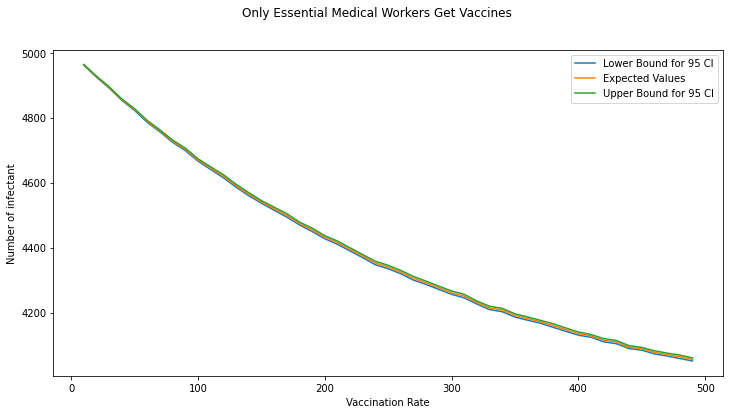

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(vac_list, [item[0] for item in estimate_infect], label = 'Lower Bound for 95 CI')
plt.plot(vac_list, [item[1] for item in estimate_infect], label = 'Expected Values')
plt.plot(vac_list, [item[2] for item in estimate_infect], label = 'Upper Bound for 95 CI')
plt.legend()
plt.xlabel('Vaccination Rate')
plt.ylabel('Number of infectant')
plt.suptitle('Only Essential Medical Workers Get Vaccines')
plt.show()

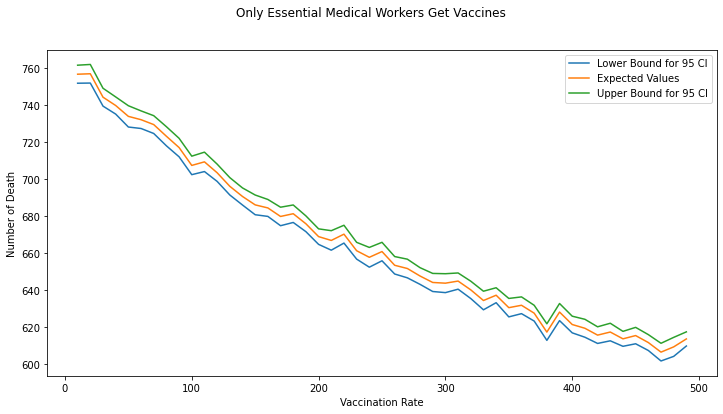

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(vac_list, [item[0] for item in estimate_death], label = 'Lower Bound for 95 CI')
plt.plot(vac_list, [item[1] for item in estimate_death], label = 'Expected Values')
plt.plot(vac_list, [item[2] for item in estimate_death], label = 'Upper Bound for 95 CI')
plt.legend()
plt.xlabel('Vaccination Rate')
plt.ylabel('Number of Death')
plt.suptitle('Only Essential Medical Workers Get Vaccines')
plt.show()

In [47]:
times = 100
vac_list = np.arange(10, 500, 10)

estimate_infect = []
estimate_death = []

for vac in vac_list:
    print(vac)
    temp_infect = []
    temp_death = []
    for i in range(times):
        total_infect, total_death = SIR(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, H_cap, pi, reco_lo, reco_hi, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac, False, lockdown_fac, vac_pri2)
        temp_infect.append(total_infect)
        temp_death.append(total_death)
    temp_mean = np.mean(temp_infect)
    temp_std = np.std(temp_infect, ddof = 1) / np.sqrt(times)
    estimate_infect.append((temp_mean - 1.96 * temp_std, temp_mean, temp_mean + 1.96 * temp_std))
    temp_mean = np.mean(temp_death)
    temp_std = np.std(temp_death, ddof = 1) / np.sqrt(times)
    estimate_death.append((temp_mean - 1.96 * temp_std, temp_mean, temp_mean + 1.96 * temp_std))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


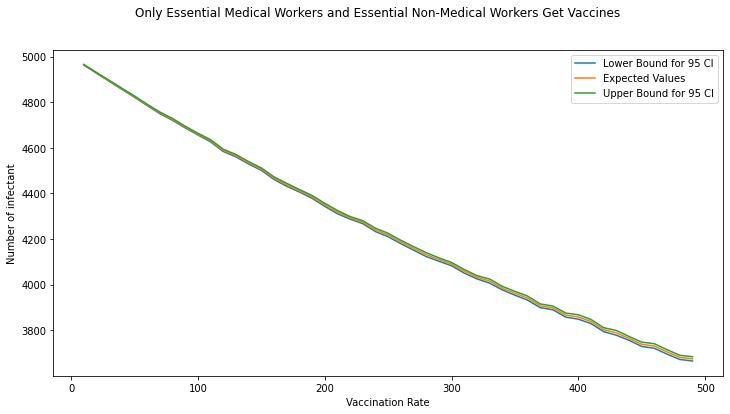

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(vac_list, [item[0] for item in estimate_infect], label = 'Lower Bound for 95 CI')
plt.plot(vac_list, [item[1] for item in estimate_infect], label = 'Expected Values')
plt.plot(vac_list, [item[2] for item in estimate_infect], label = 'Upper Bound for 95 CI')
plt.legend()
plt.xlabel('Vaccination Rate')
plt.ylabel('Number of infectant')
plt.suptitle('Only Essential Medical Workers and Essential Non-Medical Workers Get Vaccines')
plt.show()

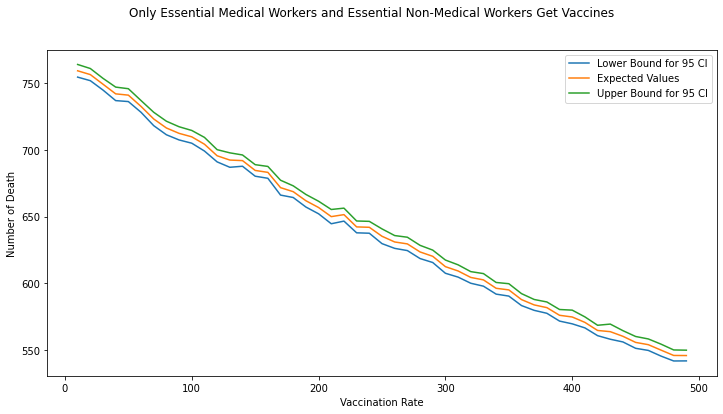

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(vac_list, [item[0] for item in estimate_death], label = 'Lower Bound for 95 CI')
plt.plot(vac_list, [item[1] for item in estimate_death], label = 'Expected Values')
plt.plot(vac_list, [item[2] for item in estimate_death], label = 'Upper Bound for 95 CI')
plt.legend()
plt.xlabel('Vaccination Rate')
plt.ylabel('Number of Death')
plt.suptitle('Only Essential Medical Workers and Essential Non-Medical Workers Get Vaccines')
plt.show()

In [50]:
times = 100
vac_list = np.arange(10, 500, 10)

estimate_infect = []
estimate_death = []

for vac in vac_list:
    print(vac)
    temp_infect = []
    temp_death = []
    for i in range(times):
        total_infect, total_death = SIR(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, H_cap, pi, reco_lo, reco_hi, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac, False, lockdown_fac, vac_pri3)
        temp_infect.append(total_infect)
        temp_death.append(total_death)
    temp_mean = np.mean(temp_infect)
    temp_std = np.std(temp_infect, ddof = 1) / np.sqrt(times)
    estimate_infect.append((temp_mean - 1.96 * temp_std, temp_mean, temp_mean + 1.96 * temp_std))
    temp_mean = np.mean(temp_death)
    temp_std = np.std(temp_death, ddof = 1) / np.sqrt(times)
    estimate_death.append((temp_mean - 1.96 * temp_std, temp_mean, temp_mean + 1.96 * temp_std))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


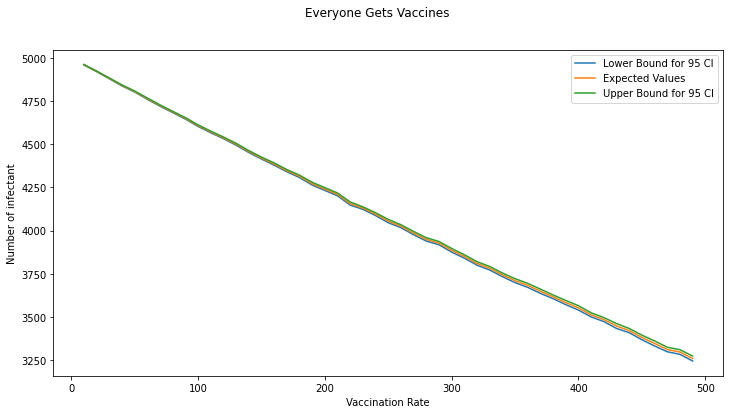

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(vac_list, [item[0] for item in estimate_infect], label = 'Lower Bound for 95 CI')
plt.plot(vac_list, [item[1] for item in estimate_infect], label = 'Expected Values')
plt.plot(vac_list, [item[2] for item in estimate_infect], label = 'Upper Bound for 95 CI')
plt.legend()
plt.xlabel('Vaccination Rate')
plt.ylabel('Number of infectant')
plt.suptitle('Everyone Gets Vaccines')
plt.show()

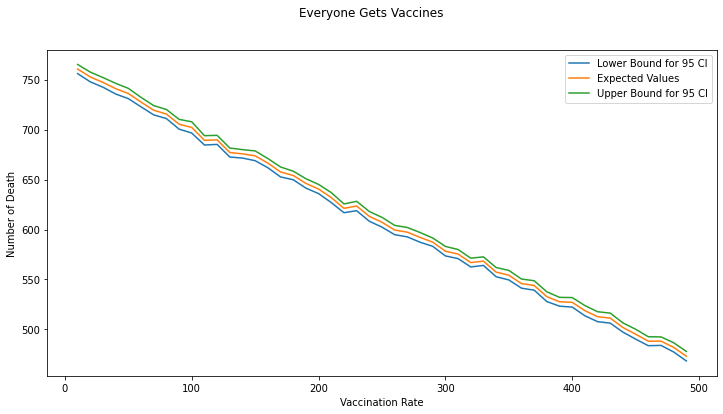

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(vac_list, [item[0] for item in estimate_death], label = 'Lower Bound for 95 CI')
plt.plot(vac_list, [item[1] for item in estimate_death], label = 'Expected Values')
plt.plot(vac_list, [item[2] for item in estimate_death], label = 'Upper Bound for 95 CI')
plt.legend()
plt.xlabel('Vaccination Rate')
plt.ylabel('Number of Death')
plt.suptitle('Everyone Gets Vaccines')
plt.show()

# Quarantine

In [6]:
c1_n = 1250
c2_n = 1250
c3_n = 1250
c4_n = 1250
c1_inf = 10 
c2_inf = 20 
c3_inf = 5 
c4_inf = 0 
Is_inf = 0
R_res = 0
H_cap = 500
#pi = 0.5 
reco_lo = 0.1
reco_hi = 0.3 
die_lo = 0.01
die_hi = 0.02
h = 1.5
l = 0.5
inf_p_lo = 0.02
inf_p_hi = 0.5
vac_rate = 50

In [7]:
def SIR_nq(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, H_cap, pi, reco_lo, reco_hi, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac_rate, keep_hist = False, lockdown_fac = 1.0, vac_pri = [1.0, 0., 0., 0.]):
    
    h = h * lockdown_fac
    l = l * lockdown_fac
    
    lam11 = h
    lam12 = h
    lam13 = l
    lam14 = l
    lam15 = h
    lam22 = h
    lam23 = h
    lam24 = h
    lam33 = l
    lam34 = l
    lam44 = l
    lamq1 = h
    lamq2 = l
    
    tot_infect = c1_inf + c2_inf + c3_inf + c4_inf + Is_inf
    
    c1_infect_hist = []
    c2_infect_hist = []
    c3_infect_hist = []
    c4_infect_hist = []
    c1_suscep_hist = []
    c2_suscep_hist = []
    c3_suscep_hist = []
    c4_suscep_hist = []
    Is_hist = []
    R_hist = []
    Death_hist = []
    Quarantine_hist = []
    
    c1_infect = []
    c2_infect = []
    c3_infect = []
    c4_infect = []
    c1_suscep = []
    c2_suscep = []
    c3_suscep = []
    c4_suscep = []
    Is = []
    R = []
    Death = []
    Quarantine = []
    
    for i in range(c1_n + c2_n + c3_n + c4_n + Is_inf + R_res):
        if i < c1_n:
            if i < c1_inf:
                c1_infect.append(i)
            else:
                c1_suscep.append(i)
        elif i < (c1_n + c2_n):
            if i < c1_n + c2_inf:
                c2_infect.append(i)
            else:
                c2_suscep.append(i)
        elif i < (c1_n + c2_n + c3_n):
            if i < c1_n + c2_n + c3_inf:
                c3_infect.append(i)
            else:
                c3_suscep.append(i)
        elif i < (c1_n + c2_n + c3_n + c4_n):
            if i < (c1_n + c2_n + c3_n + c4_inf):
                c4_infect.append(i)
            else:
                c4_suscep.append(i)
        elif i < (c1_n + c2_n + c3_n + c4_n + Is_inf):
            Is.append(i)
        else:
            R.append(i)
            
    if keep_hist == True:
        c1_infect_hist.append(c1_infect.copy())
        c2_infect_hist.append(c2_infect.copy())
        c3_infect_hist.append(c3_infect.copy())
        c4_infect_hist.append(c4_infect.copy())
        c1_suscep_hist.append(c1_suscep.copy())
        c2_suscep_hist.append(c2_suscep.copy())
        c3_suscep_hist.append(c3_suscep.copy())
        c4_suscep_hist.append(c4_suscep.copy())
        Is_hist.append(Is.copy())
        R_hist.append(R.copy())
        Death_hist.append(Death.copy())
        Quarantine_hist.append(Quarantine.copy())
    
    while len(c1_infect) + len(c2_infect) + len(c3_infect) + len(c4_infect) + len(Is) + len(Quarantine) > 0:
        
        # infection rates
        ra_11 = len(c1_infect) * len(c1_suscep) * lam11 * inf_p_hi
        ra_12 = len(c1_infect) * len(c2_suscep) * lam12 * inf_p_hi
        ra_21 = len(c1_suscep) * len(c2_infect) * lam12 * inf_p_hi
        ra_13 = len(c1_infect) * len(c3_suscep) * lam13 * inf_p_hi
        ra_31 = len(c1_suscep) * len(c3_infect) * lam13 * inf_p_hi
        ra_14 = len(c1_infect) * len(c4_suscep) * lam14 * inf_p_hi
        ra_41 = len(c1_suscep) * len(c4_infect) * lam14 * inf_p_hi
        ra_s1 = len(c1_suscep) * len(Is) * lam15 * inf_p_lo
        ra_22 = len(c2_infect) * len(c2_suscep) * lam22 * inf_p_hi
        ra_23 = len(c2_infect) * len(c3_suscep) * lam23 * inf_p_hi
        ra_32 = len(c2_suscep) * len(c3_infect) * lam23 * inf_p_hi
        ra_24 = len(c2_infect) * len(c4_suscep) * lam24 * inf_p_hi
        ra_42 = len(c2_suscep) * len(c4_infect) * lam24 * inf_p_hi
        ra_33 = len(c3_infect) * len(c3_suscep) * lam33 * inf_p_hi
        ra_34 = len(c3_infect) * len(c4_suscep) * lam34 * inf_p_hi
        ra_43 = len(c3_suscep) * len(c4_infect) * lam34 * inf_p_hi
        ra_44 = len(c4_infect) * len(c4_suscep) * lam44 * inf_p_hi
        
        # recover rates
        re_c1 = len(c1_infect) * reco_lo
        re_c2 = len(c2_infect) * reco_lo
        re_c3 = len(c3_infect) * reco_lo
        re_c4 = len(c4_infect) * reco_lo
        re_Is = len(Is) * reco_hi
        
        # death rates
        de_c1 = len(c1_infect) * die_hi
        de_c2 = len(c2_infect) * die_hi
        de_c3 = len(c3_infect) * die_hi
        de_c4 = len(c4_infect) * die_hi
        de_Is = len(Is) * die_lo
        
        # quanantine infection rates
        ra_q1 = len(Quarantine) * len(c1_suscep) * lamq1 * inf_p_lo
        ra_q2 = len(Quarantine) * len(c2_suscep) * lamq2 * inf_p_lo
        
        # vaccination rates
        va_c1 = len(c1_suscep) * vac_rate * vac_pri[0]
        va_c2 = len(c2_suscep) * vac_rate * vac_pri[1]
        va_c3 = len(c3_suscep) * vac_rate * vac_pri[2]
        va_c4 = len(c4_suscep) * vac_rate * vac_pri[3]
        
        # quarantine
        re_qu = len(Quarantine) * reco_lo
        de_qu = len(Quarantine) * die_hi
        
        sum_rate1 = ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1 + ra_22 + ra_23 + ra_32
        sum_rate2 = ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1 + re_c2 + re_c3 + re_c4 + re_Is
        sum_rate3 = de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2 + va_c1 + va_c2 + va_c3 + va_c4
        sum_rate = sum_rate1 + sum_rate2 + sum_rate3 + re_qu + de_qu
        
        rv = np.random.uniform()
        rv2 = np.random.uniform()
        
        if rv < ra_11 / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c1_infect.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c2_infect.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c1_infect.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13) / sum_rate:
            infected = c3_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c3_infect.append(infected)
            else:
                c3_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c1_infect.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14) / sum_rate:
            infected = c4_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c4_infect.append(infected)
            else:
                c4_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c1_infect.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c1_infect.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1 + ra_22) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c2_infect.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1 + ra_22 + ra_23) / sum_rate:
            infected = c3_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c3_infect.append(infected)
            else:
                c3_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1 + ra_22 + ra_23 + ra_32) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c2_infect.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (sum_rate1 + ra_24) / sum_rate:
            infected = c4_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c4_infect.append(infected)
            else:
                c4_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c2_infect.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33) / sum_rate:
            infected = c3_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c3_infect.append(infected)
            else:
                c3_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34) / sum_rate:
            infected = c4_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c4_infect.append(infected)
            else:
                c4_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43) / sum_rate:
            infected = c3_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c3_infect.append(infected)
            else:
                c3_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44) / sum_rate:
            infected = c4_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c4_infect.append(infected)
            else:
                c4_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1) / sum_rate:
            recovered = c1_infect.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1 + re_c2) / sum_rate:
            recovered = c2_infect.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1 + re_c2 + re_c3) / sum_rate:
            recovered = c3_infect.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1 + re_c2 + re_c3 + re_c4) / sum_rate:
            recovered = c4_infect.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + sum_rate2) / sum_rate:
            recovered = Is.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + sum_rate2 + de_c1) / sum_rate:
            dead = c1_infect.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2) / sum_rate:
            dead = c2_infect.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3) / sum_rate:
            dead = c3_infect.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4) / sum_rate:
            dead = c4_infect.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is) / sum_rate:
            dead = Is.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c1_infect.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    c2_infect.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2 + va_c1) / sum_rate:
            vaccine = c1_suscep.pop(0)
            R.append(vaccine)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2 + va_c1 + va_c2) / sum_rate:
            vaccine = c2_suscep.pop(0)
            R.append(vaccine)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2 + va_c1 + va_c2 + va_c3) / sum_rate:
            vaccine = c3_suscep.pop(0)
            R.append(vaccine)
        elif rv < (sum_rate1 + sum_rate2 + sum_rate3) / sum_rate:
            vaccine = c4_suscep.pop(0)
            R.append(vaccine)
        elif rv < (sum_rate1 + sum_rate2 + sum_rate3 + re_qu) / sum_rate:
            recovered = Quarantine.pop(0)
            R.append(recovered)
        else:
            dead = Quarantine.pop(0)
            Death.append(dead)
        
        if keep_hist == True:
            c1_infect_hist.append(c1_infect.copy())
            c2_infect_hist.append(c2_infect.copy())
            c3_infect_hist.append(c3_infect.copy())
            c4_infect_hist.append(c4_infect.copy())
            c1_suscep_hist.append(c1_suscep.copy())
            c2_suscep_hist.append(c2_suscep.copy())
            c3_suscep_hist.append(c3_suscep.copy())
            c4_suscep_hist.append(c4_suscep.copy())
            Is_hist.append(Is.copy())
            R_hist.append(R.copy())
            Death_hist.append(Death.copy())
            Quarantine_hist.append(Quarantine.copy())
        
    if keep_hist == True:
        return c1_infect_hist, c2_infect_hist, c3_infect_hist, c4_infect_hist, c1_suscep_hist, c2_suscep_hist, c3_suscep_hist, c4_suscep_hist, Is_hist, R_hist, Death_hist, Quarantine_hist
    else:
        return tot_infect, len(Death)

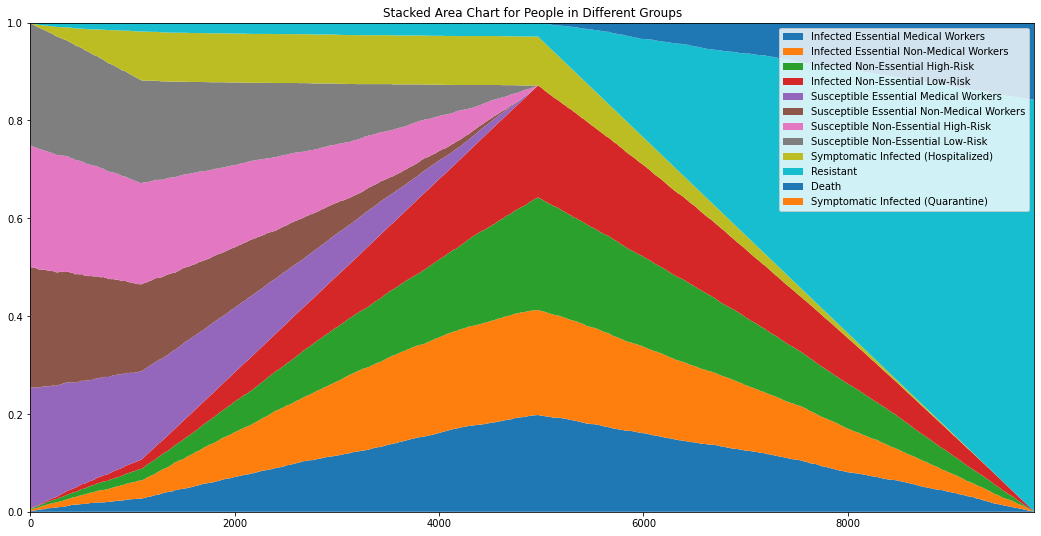

In [12]:
c1_infect_hist, c2_infect_hist, c3_infect_hist, c4_infect_hist, c1_suscep_hist, c2_suscep_hist, c3_suscep_hist, c4_suscep_hist\
, Is_hist, R_hist, death_hist, quar_hist = SIR_nq(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, H_cap, 0.5, reco_lo, reco_hi, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac_rate, True)

c1_inf_num = [len(item) for item in c1_infect_hist]
c2_inf_num = [len(item) for item in c2_infect_hist]
c3_inf_num = [len(item) for item in c3_infect_hist]
c4_inf_num = [len(item) for item in c4_infect_hist]
c1_sus_num = [len(item) for item in c1_suscep_hist]
c2_sus_num = [len(item) for item in c2_suscep_hist]
c3_sus_num = [len(item) for item in c3_suscep_hist]
c4_sus_num = [len(item) for item in c4_suscep_hist]
Is_num = [len(item) for item in Is_hist]
R_num = [len(item) for item in R_hist]
D_num = [len(item) for item in death_hist]
Q_num = [len(item) for item in quar_hist]

data = pd.DataFrame({'Infected Essential Medical Workers':c1_inf_num, 'Infected Essential Non-Medical Workers':c2_inf_num, \
                    'Infected Non-Essential High-Risk':c3_inf_num, 'Infected Non-Essential Low-Risk':c4_inf_num, \
                    'Susceptible Essential Medical Workers':c1_sus_num, 'Susceptible Essential Non-Medical Workers':c2_sus_num, \
                    'Susceptible Non-Essential High-Risk': c3_sus_num, 'Susceptible Non-Essential Low-Risk':c4_sus_num, \
                    'Symptomatic Infected (Hospitalized)':Is_num, 'Resistant':R_num, 'Death':D_num, 'Symptomatic Infected (Quarantine)':Q_num})

data_perc = data.divide(data.sum(axis=1), axis = 0)

plt.figure(figsize=(18, 9))
plt.stackplot(range(len(c1_inf_num)),  data_perc["Infected Essential Medical Workers"],  data_perc["Infected Essential Non-Medical Workers"], \
              data_perc["Infected Non-Essential High-Risk"], data_perc["Infected Non-Essential Low-Risk"], \
              data_perc["Susceptible Essential Medical Workers"], data_perc["Susceptible Essential Non-Medical Workers"], \
              data_perc["Susceptible Non-Essential High-Risk"], data_perc["Susceptible Non-Essential Low-Risk"], \
              data_perc["Symptomatic Infected (Hospitalized)"], data_perc["Resistant"], data_perc["Death"], data_perc["Symptomatic Infected (Quarantine)"], labels=data_perc.columns)
plt.legend(loc='upper right')
plt.margins(0,0)
plt.title('Stacked Area Chart for People in Different Groups')
plt.show()

In [8]:
times = 100

# probability that an infection is symptomatic
pi_list = np.arange(0.1, 1.0, 0.05)

estimate_diff_infect = []
estimate_diff_death = []

for pi in pi_list:
    print(pi)
    temp_infect_diff = []
    temp_death_diff = []
    for i in range(times):
        total_infect1, total_death1 = SIR(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, H_cap, pi, reco_lo, reco_hi, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac_rate)
        total_infect2, total_death2 = SIR_nq(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, H_cap, pi, reco_lo, reco_hi, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac_rate)
        temp_infect_diff.append(total_infect2 - total_infect1)
        temp_death_diff.append(total_death2 - total_death1)
    temp_mean = np.mean(temp_infect_diff)
    temp_std = np.std(temp_infect_diff, ddof = 1) / np.sqrt(times)
    estimate_diff_infect.append((temp_mean - 1.96 * temp_std, temp_mean, temp_mean + 1.96 * temp_std))
    temp_mean = np.mean(temp_death_diff)
    temp_std = np.std(temp_death_diff, ddof = 1) / np.sqrt(times)
    estimate_diff_death.append((temp_mean - 1.96 * temp_std, temp_mean, temp_mean + 1.96 * temp_std))

0.1
0.15000000000000002
0.20000000000000004
0.25000000000000006
0.30000000000000004
0.3500000000000001
0.40000000000000013
0.45000000000000007
0.5000000000000001
0.5500000000000002
0.6000000000000002
0.6500000000000001
0.7000000000000002
0.7500000000000002
0.8000000000000002
0.8500000000000002
0.9000000000000002
0.9500000000000003


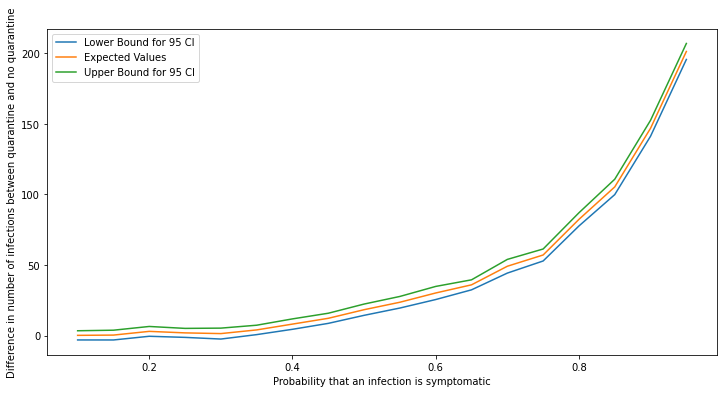

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(pi_list, [item[0] for item in estimate_diff_infect], label = 'Lower Bound for 95 CI')
plt.plot(pi_list, [item[1] for item in estimate_diff_infect], label = 'Expected Values')
plt.plot(pi_list, [item[2] for item in estimate_diff_infect], label = 'Upper Bound for 95 CI')
plt.legend()
plt.xlabel('Probability that an infection is symptomatic')
plt.ylabel('Difference in number of infections between quarantine and no quarantine')
plt.show()

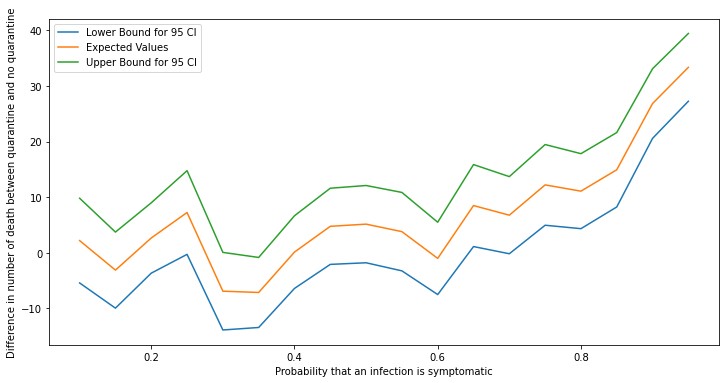

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(pi_list, [item[0] for item in estimate_diff_death], label = 'Lower Bound for 95 CI')
plt.plot(pi_list, [item[1] for item in estimate_diff_death], label = 'Expected Values')
plt.plot(pi_list, [item[2] for item in estimate_diff_death], label = 'Upper Bound for 95 CI')
plt.legend()
plt.xlabel('Probability that an infection is symptomatic')
plt.ylabel('Difference in number of death between quarantine and no quarantine')
plt.show()

# Lockdowns

In [ ]:
c1_n = 1250
c2_n = 1250
c3_n = 1250
c4_n = 1250
c1_inf = 10 
c2_inf = 20 
c3_inf = 5 
c4_inf = 0 
Is_inf = 0
R_res = 0
H_cap = 500
pi = 0.5 
reco_lo = 0.1
reco_hi = 0.3 
die_lo = 0.01
die_hi = 0.02
h = 1.5
l = 0.5
inf_p_lo = 0.02
inf_p_hi = 0.5
vac_rate = 50
# lockdown_fac = 1.0

In [14]:
times = 100

# Lockdown measures
ld_list = np.arange(0.1, 1.01, 0.05)

estimate_infect = []
estimate_death = []

for ld in ld_list:
    print(ld)
    temp_infect = []
    temp_death = []
    for i in range(times):
        total_infect, total_death = SIR(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, H_cap, pi, reco_lo, reco_hi, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac_rate, False, ld)
        temp_infect.append(total_infect)
        temp_death.append(total_death)
    temp_mean = np.mean(temp_infect)
    temp_std = np.std(temp_infect, ddof = 1) / np.sqrt(times)
    estimate_infect.append((temp_mean - 1.96 * temp_std, temp_mean, temp_mean + 1.96 * temp_std))
    temp_mean = np.mean(temp_death)
    temp_std = np.std(temp_death, ddof = 1) / np.sqrt(times)
    estimate_death.append((temp_mean - 1.96 * temp_std, temp_mean, temp_mean + 1.96 * temp_std))

0.1
0.15000000000000002
0.20000000000000004
0.25000000000000006
0.30000000000000004
0.3500000000000001
0.40000000000000013
0.45000000000000007
0.5000000000000001
0.5500000000000002
0.6000000000000002
0.6500000000000001
0.7000000000000002
0.7500000000000002
0.8000000000000002
0.8500000000000002
0.9000000000000002
0.9500000000000003
1.0000000000000004


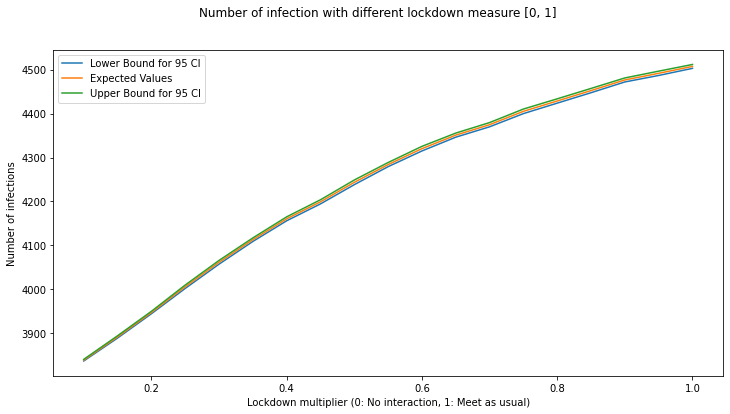

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(ld_list, [item[0] for item in estimate_infect], label = 'Lower Bound for 95 CI')
plt.plot(ld_list, [item[1] for item in estimate_infect], label = 'Expected Values')
plt.plot(ld_list, [item[2] for item in estimate_infect], label = 'Upper Bound for 95 CI')
plt.legend()
plt.xlabel('Lockdown multiplier (0: No interaction, 1: Meet as usual)')
plt.ylabel('Number of infections')
plt.suptitle('Number of infection with different lockdown measure [0, 1]')
plt.show()

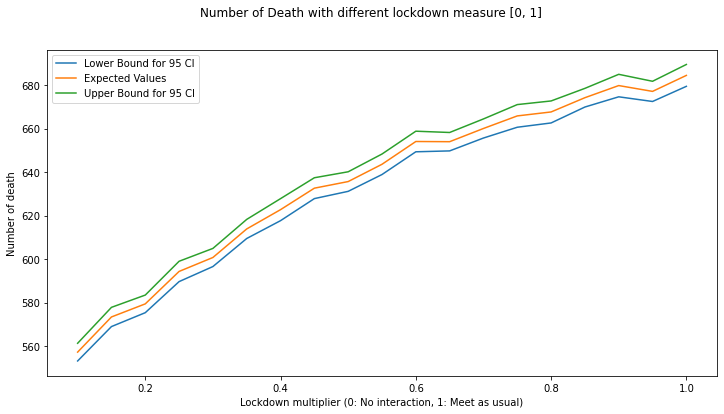

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(ld_list, [item[0] for item in estimate_death], label = 'Lower Bound for 95 CI')
plt.plot(ld_list, [item[1] for item in estimate_death], label = 'Expected Values')
plt.plot(ld_list, [item[2] for item in estimate_death], label = 'Upper Bound for 95 CI')
plt.legend()
plt.xlabel('Lockdown multiplier (0: No interaction, 1: Meet as usual)')
plt.ylabel('Number of death')
plt.suptitle('Number of Death with different lockdown measure [0, 1]')
plt.show()

# 'Herd Immunity'

Allowing infections among low-risk groups

Interactions between non-essential high-risk group with any groups are either halved or cut to 0.

In [17]:
c1_n = 1250
c2_n = 1250
c3_n = 1250
c4_n = 1250
c1_inf = 10 
c2_inf = 20 
c3_inf = 5 
c4_inf = 0 
Is_inf = 0
R_res = 0
H_cap = 500
pi = 0.5 
reco_lo = 0.1
reco_hi = 0.3 
die_lo = 0.01
die_hi = 0.02
h = 1.5
l = 0.5
inf_p_lo = 0.02
inf_p_hi = 0.5
vac_rate = 50

In [20]:
def SIR_hi(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, H_cap, pi, reco_lo, reco_hi, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac_rate, keep_hist = False, lockdown_fac = 1.0, vac_pri = [1.0, 0., 0., 0.]):
    
    h = h * lockdown_fac
    l = l * lockdown_fac
    
    lam11 = h
    lam12 = h
    lam13 = l / 2.
    lam14 = h
    lam15 = h
    lam22 = h
    lam23 = l / 2.
    lam24 = h
    lam33 = l / 2.
    lam34 = 0
    lam44 = h
    lamq1 = h
    lamq2 = l
    
    tot_infect = c1_inf + c2_inf + c3_inf + c4_inf + Is_inf
    
    c1_infect_hist = []
    c2_infect_hist = []
    c3_infect_hist = []
    c4_infect_hist = []
    c1_suscep_hist = []
    c2_suscep_hist = []
    c3_suscep_hist = []
    c4_suscep_hist = []
    Is_hist = []
    R_hist = []
    Death_hist = []
    Quarantine_hist = []
    
    c1_infect = []
    c2_infect = []
    c3_infect = []
    c4_infect = []
    c1_suscep = []
    c2_suscep = []
    c3_suscep = []
    c4_suscep = []
    Is = []
    R = []
    Death = []
    Quarantine = []
    
    for i in range(c1_n + c2_n + c3_n + c4_n + Is_inf + R_res):
        if i < c1_n:
            if i < c1_inf:
                c1_infect.append(i)
            else:
                c1_suscep.append(i)
        elif i < (c1_n + c2_n):
            if i < c1_n + c2_inf:
                c2_infect.append(i)
            else:
                c2_suscep.append(i)
        elif i < (c1_n + c2_n + c3_n):
            if i < c1_n + c2_n + c3_inf:
                c3_infect.append(i)
            else:
                c3_suscep.append(i)
        elif i < (c1_n + c2_n + c3_n + c4_n):
            if i < (c1_n + c2_n + c3_n + c4_inf):
                c4_infect.append(i)
            else:
                c4_suscep.append(i)
        elif i < (c1_n + c2_n + c3_n + c4_n + Is_inf):
            Is.append(i)
        else:
            R.append(i)
            
    if keep_hist == True:
        c1_infect_hist.append(c1_infect.copy())
        c2_infect_hist.append(c2_infect.copy())
        c3_infect_hist.append(c3_infect.copy())
        c4_infect_hist.append(c4_infect.copy())
        c1_suscep_hist.append(c1_suscep.copy())
        c2_suscep_hist.append(c2_suscep.copy())
        c3_suscep_hist.append(c3_suscep.copy())
        c4_suscep_hist.append(c4_suscep.copy())
        Is_hist.append(Is.copy())
        R_hist.append(R.copy())
        Death_hist.append(Death.copy())
        Quarantine_hist.append(Quarantine.copy())
    
    while len(c1_infect) + len(c2_infect) + len(c3_infect) + len(c4_infect) + len(Is) + len(Quarantine) > 0:
        
        # infection rates
        ra_11 = len(c1_infect) * len(c1_suscep) * lam11 * inf_p_hi
        ra_12 = len(c1_infect) * len(c2_suscep) * lam12 * inf_p_hi
        ra_21 = len(c1_suscep) * len(c2_infect) * lam12 * inf_p_hi
        ra_13 = len(c1_infect) * len(c3_suscep) * lam13 * inf_p_hi
        ra_31 = len(c1_suscep) * len(c3_infect) * lam13 * inf_p_hi
        ra_14 = len(c1_infect) * len(c4_suscep) * lam14 * inf_p_hi
        ra_41 = len(c1_suscep) * len(c4_infect) * lam14 * inf_p_hi
        ra_s1 = len(c1_suscep) * len(Is) * lam15 * inf_p_lo
        ra_22 = len(c2_infect) * len(c2_suscep) * lam22 * inf_p_hi
        ra_23 = len(c2_infect) * len(c3_suscep) * lam23 * inf_p_hi
        ra_32 = len(c2_suscep) * len(c3_infect) * lam23 * inf_p_hi
        ra_24 = len(c2_infect) * len(c4_suscep) * lam24 * inf_p_hi
        ra_42 = len(c2_suscep) * len(c4_infect) * lam24 * inf_p_hi
        ra_33 = len(c3_infect) * len(c3_suscep) * lam33 * inf_p_hi
        ra_34 = len(c3_infect) * len(c4_suscep) * lam34 * inf_p_hi
        ra_43 = len(c3_suscep) * len(c4_infect) * lam34 * inf_p_hi
        ra_44 = len(c4_infect) * len(c4_suscep) * lam44 * inf_p_hi
        
        # recover rates
        re_c1 = len(c1_infect) * reco_lo
        re_c2 = len(c2_infect) * reco_lo
        re_c3 = len(c3_infect) * reco_lo
        re_c4 = len(c4_infect) * reco_lo
        re_Is = len(Is) * reco_hi
        
        # death rates
        de_c1 = len(c1_infect) * die_hi
        de_c2 = len(c2_infect) * die_hi
        de_c3 = len(c3_infect) * die_hi
        de_c4 = len(c4_infect) * die_hi
        de_Is = len(Is) * die_lo
        
        # quanantine infection rates
        ra_q1 = len(Quarantine) * len(c1_suscep) * lamq1 * inf_p_lo
        ra_q2 = len(Quarantine) * len(c2_suscep) * lamq2 * inf_p_lo
        
        # vaccination rates
        va_c1 = len(c1_suscep) * vac_rate * vac_pri[0]
        va_c2 = len(c2_suscep) * vac_rate * vac_pri[1]
        va_c3 = len(c3_suscep) * vac_rate * vac_pri[2]
        va_c4 = len(c4_suscep) * vac_rate * vac_pri[3]
        
        # quarantine
        re_qu = len(Quarantine) * reco_lo
        de_qu = len(Quarantine) * die_hi
        
        sum_rate1 = ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1 + ra_22 + ra_23 + ra_32
        sum_rate2 = ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1 + re_c2 + re_c3 + re_c4 + re_Is
        sum_rate3 = de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2 + va_c1 + va_c2 + va_c3 + va_c4
        sum_rate = sum_rate1 + sum_rate2 + sum_rate3 + re_qu + de_qu
        
        rv = np.random.uniform()
        rv2 = np.random.uniform()
        
        if rv < ra_11 / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13) / sum_rate:
            infected = c3_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c3_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14) / sum_rate:
            infected = c4_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c4_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1 + ra_22) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1 + ra_22 + ra_23) / sum_rate:
            infected = c3_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c3_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1 + ra_22 + ra_23 + ra_32) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (sum_rate1 + ra_24) / sum_rate:
            infected = c4_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c4_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33) / sum_rate:
            infected = c3_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c3_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34) / sum_rate:
            infected = c4_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c4_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43) / sum_rate:
            infected = c3_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c3_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44) / sum_rate:
            infected = c4_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c4_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1) / sum_rate:
            recovered = c1_infect.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1 + re_c2) / sum_rate:
            recovered = c2_infect.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1 + re_c2 + re_c3) / sum_rate:
            recovered = c3_infect.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1 + re_c2 + re_c3 + re_c4) / sum_rate:
            recovered = c4_infect.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + sum_rate2) / sum_rate:
            recovered = Is.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + sum_rate2 + de_c1) / sum_rate:
            dead = c1_infect.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2) / sum_rate:
            dead = c2_infect.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3) / sum_rate:
            dead = c3_infect.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4) / sum_rate:
            dead = c4_infect.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is) / sum_rate:
            dead = Is.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2 + va_c1) / sum_rate:
            vaccine = c1_suscep.pop(0)
            R.append(vaccine)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2 + va_c1 + va_c2) / sum_rate:
            vaccine = c2_suscep.pop(0)
            R.append(vaccine)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2 + va_c1 + va_c2 + va_c3) / sum_rate:
            vaccine = c3_suscep.pop(0)
            R.append(vaccine)
        elif rv < (sum_rate1 + sum_rate2 + sum_rate3) / sum_rate:
            vaccine = c4_suscep.pop(0)
            R.append(vaccine)
        elif rv < (sum_rate1 + sum_rate2 + sum_rate3 + re_qu) / sum_rate:
            recovered = Quarantine.pop(0)
            R.append(recovered)
        else:
            dead = Quarantine.pop(0)
            Death.append(dead)
        
        if keep_hist == True:
            c1_infect_hist.append(c1_infect.copy())
            c2_infect_hist.append(c2_infect.copy())
            c3_infect_hist.append(c3_infect.copy())
            c4_infect_hist.append(c4_infect.copy())
            c1_suscep_hist.append(c1_suscep.copy())
            c2_suscep_hist.append(c2_suscep.copy())
            c3_suscep_hist.append(c3_suscep.copy())
            c4_suscep_hist.append(c4_suscep.copy())
            Is_hist.append(Is.copy())
            R_hist.append(R.copy())
            Death_hist.append(Death.copy())
            Quarantine_hist.append(Quarantine.copy())
        
    if keep_hist == True:
        return c1_infect_hist, c2_infect_hist, c3_infect_hist, c4_infect_hist, c1_suscep_hist, c2_suscep_hist, c3_suscep_hist, c4_suscep_hist, Is_hist, R_hist, Death_hist, Quarantine_hist
    else:
        return tot_infect, len(Death)

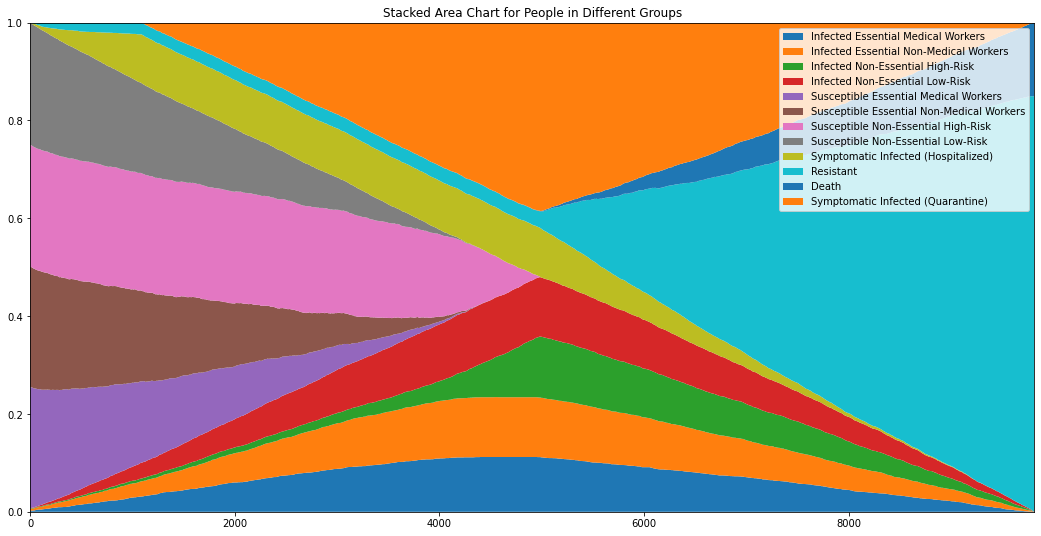

In [21]:
c1_infect_hist, c2_infect_hist, c3_infect_hist, c4_infect_hist, c1_suscep_hist, c2_suscep_hist, c3_suscep_hist, c4_suscep_hist\
, Is_hist, R_hist, death_hist, quar_hist = SIR_hi(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, H_cap, 0.5, reco_lo, reco_hi, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac_rate, True)

c1_inf_num = [len(item) for item in c1_infect_hist]
c2_inf_num = [len(item) for item in c2_infect_hist]
c3_inf_num = [len(item) for item in c3_infect_hist]
c4_inf_num = [len(item) for item in c4_infect_hist]
c1_sus_num = [len(item) for item in c1_suscep_hist]
c2_sus_num = [len(item) for item in c2_suscep_hist]
c3_sus_num = [len(item) for item in c3_suscep_hist]
c4_sus_num = [len(item) for item in c4_suscep_hist]
Is_num = [len(item) for item in Is_hist]
R_num = [len(item) for item in R_hist]
D_num = [len(item) for item in death_hist]
Q_num = [len(item) for item in quar_hist]

data = pd.DataFrame({'Infected Essential Medical Workers':c1_inf_num, 'Infected Essential Non-Medical Workers':c2_inf_num, \
                    'Infected Non-Essential High-Risk':c3_inf_num, 'Infected Non-Essential Low-Risk':c4_inf_num, \
                    'Susceptible Essential Medical Workers':c1_sus_num, 'Susceptible Essential Non-Medical Workers':c2_sus_num, \
                    'Susceptible Non-Essential High-Risk': c3_sus_num, 'Susceptible Non-Essential Low-Risk':c4_sus_num, \
                    'Symptomatic Infected (Hospitalized)':Is_num, 'Resistant':R_num, 'Death':D_num, 'Symptomatic Infected (Quarantine)':Q_num})

data_perc = data.divide(data.sum(axis=1), axis = 0)

plt.figure(figsize=(18, 9))
plt.stackplot(range(len(c1_inf_num)),  data_perc["Infected Essential Medical Workers"],  data_perc["Infected Essential Non-Medical Workers"], \
              data_perc["Infected Non-Essential High-Risk"], data_perc["Infected Non-Essential Low-Risk"], \
              data_perc["Susceptible Essential Medical Workers"], data_perc["Susceptible Essential Non-Medical Workers"], \
              data_perc["Susceptible Non-Essential High-Risk"], data_perc["Susceptible Non-Essential Low-Risk"], \
              data_perc["Symptomatic Infected (Hospitalized)"], data_perc["Resistant"], data_perc["Death"], data_perc["Symptomatic Infected (Quarantine)"], labels=data_perc.columns)
plt.legend(loc='upper right')
plt.margins(0,0)
plt.title('Stacked Area Chart for People in Different Groups')
plt.show()

### 'Herd Immunity' vs Moderate Level of Lockdown

In [22]:
times = 100

# probability that an infection is symptomatic
reco_mult_list = np.arange(0.1, 5.1, 0.1)

estimate_diff_infect = []
estimate_diff_death = []

for mul in reco_mult_list:
    print(mul)
    temp_infect_diff = []
    temp_death_diff = []
    for i in range(times):
        total_infect1, total_death1 = SIR(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, H_cap, pi, reco_lo * mul, reco_hi * mul, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac_rate, False, 0.5)
        total_infect2, total_death2 = SIR_hi(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, H_cap, pi, reco_lo * mul, reco_hi * mul, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac_rate)
        temp_infect_diff.append(total_infect2 - total_infect1)
        temp_death_diff.append(total_death2 - total_death1)
    temp_mean = np.mean(temp_infect_diff)
    temp_std = np.std(temp_infect_diff, ddof = 1) / np.sqrt(times)
    estimate_diff_infect.append((temp_mean - 1.96 * temp_std, temp_mean, temp_mean + 1.96 * temp_std))
    temp_mean = np.mean(temp_death_diff)
    temp_std = np.std(temp_death_diff, ddof = 1) / np.sqrt(times)
    estimate_diff_death.append((temp_mean - 1.96 * temp_std, temp_mean, temp_mean + 1.96 * temp_std))

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
1.3000000000000003
1.4000000000000001
1.5000000000000002
1.6
1.7000000000000002
1.8000000000000003
1.9000000000000001
2.0
2.1
2.2
2.3000000000000003
2.4000000000000004
2.5000000000000004
2.6
2.7
2.8000000000000003
2.9000000000000004
3.0000000000000004
3.1
3.2
3.3000000000000003
3.4000000000000004
3.5000000000000004
3.6
3.7
3.8000000000000003
3.9000000000000004
4.0
4.1
4.2
4.3
4.3999999999999995
4.5
4.6
4.7
4.8
4.9
5.0


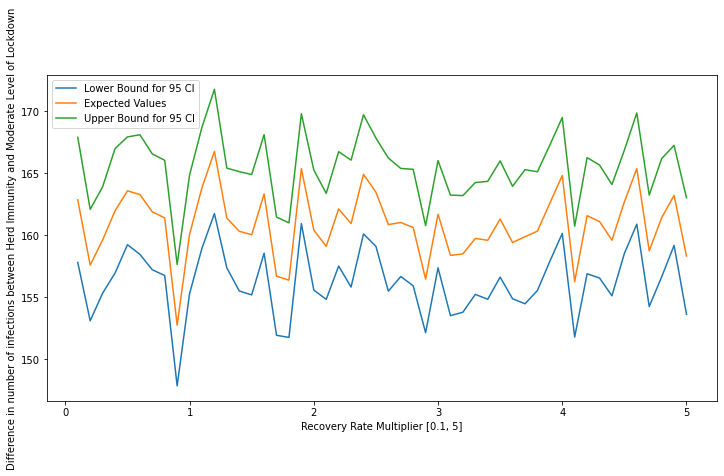

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(reco_mult_list, [item[0] for item in estimate_diff_infect], label = 'Lower Bound for 95 CI')
plt.plot(reco_mult_list, [item[1] for item in estimate_diff_infect], label = 'Expected Values')
plt.plot(reco_mult_list, [item[2] for item in estimate_diff_infect], label = 'Upper Bound for 95 CI')
plt.legend()
plt.xlabel('Recovery Rate Multiplier [0.1, 5]')
plt.ylabel('Difference in number of infections between Herd Immunity and Moderate Level of Lockdown')
plt.show()

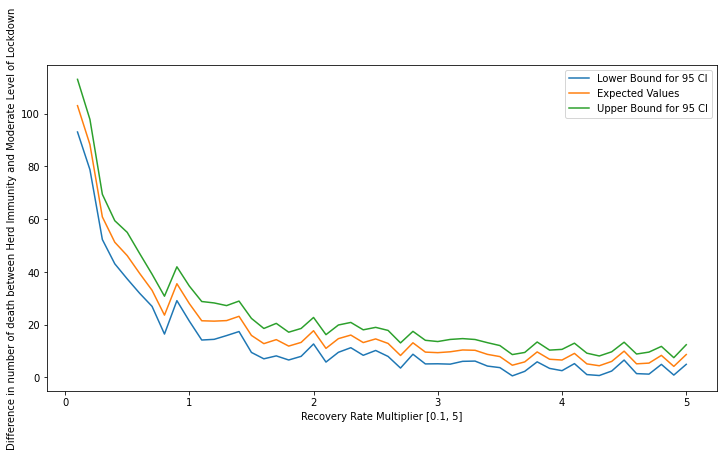

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(reco_mult_list, [item[0] for item in estimate_diff_death], label = 'Lower Bound for 95 CI')
plt.plot(reco_mult_list, [item[1] for item in estimate_diff_death], label = 'Expected Values')
plt.plot(reco_mult_list, [item[2] for item in estimate_diff_death], label = 'Upper Bound for 95 CI')
plt.legend()
plt.xlabel('Recovery Rate Multiplier [0.1, 5]')
plt.ylabel('Difference in number of death between Herd Immunity and Moderate Level of Lockdown')
plt.show()